### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-1 A Simple Neural Network</div>

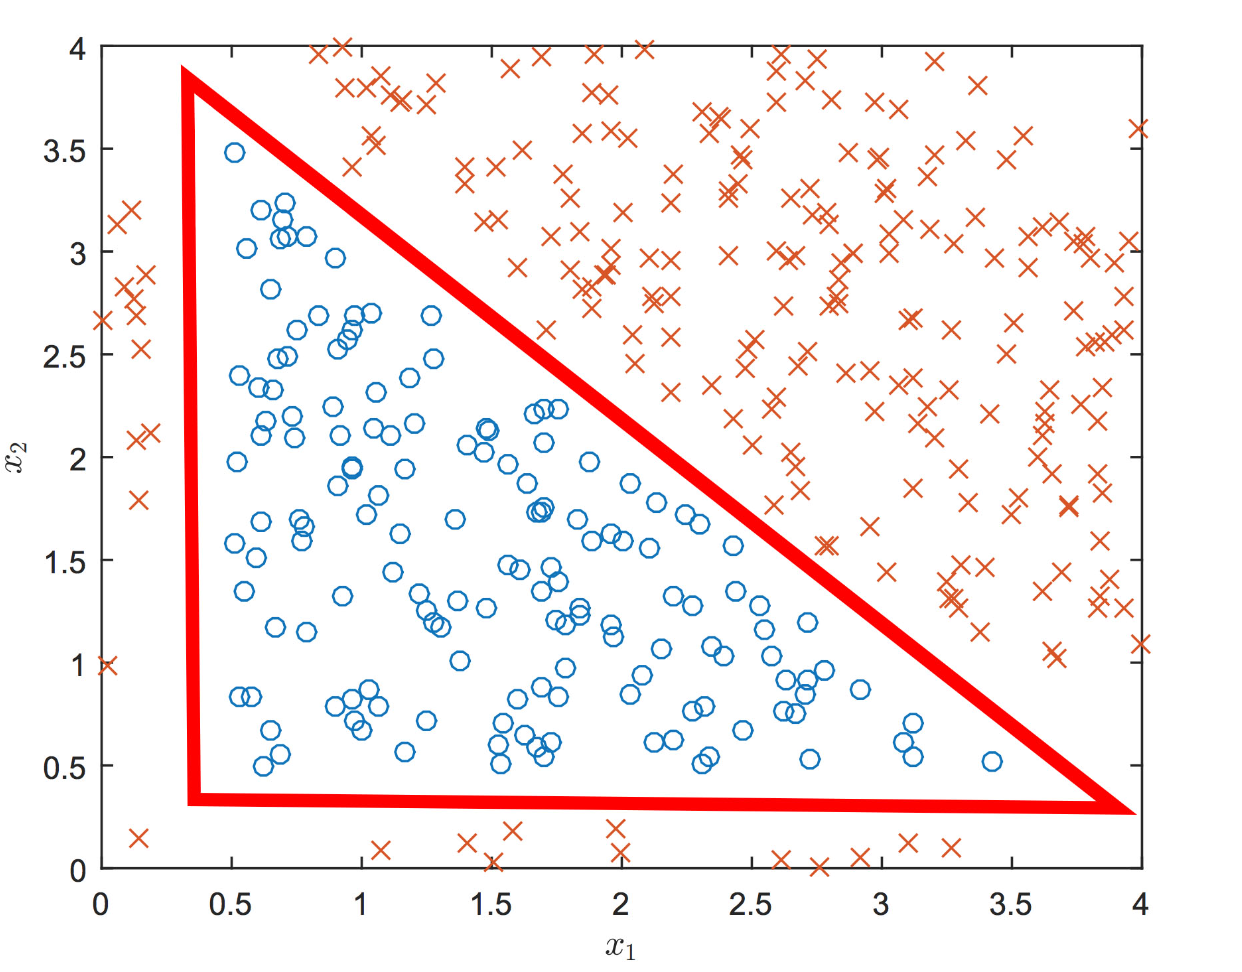

#### b)
It seems that a triangle can separate the data.

We can construct a weight matrix by using a combination of linear classifiers, where each side of the triangle represents a decision boundary.

Each side of the triangle can be represented by an equation of the form $w_o + w_1x_1+ w_2x_2 = 0$ . If we transform this equality into an inequality, then the output represents on which side of the decision boundary a given data point $(x_1,x_2)$  belongs. The intersection of the outputs for each of these decision boundaries tells us whether $(x_1,x_2)$ lies within the triangle, in which case we will classify it 1 , and if not as 0.

The first weight matrix can be written as:
$$
W^{[1]}=\left(\begin{array}{ccc}
-1 & 4 & 0 \\
-1 & 0 & 4 \\
4.5 & -1 & -1
\end{array}\right)
$$
The input vector is:
$$
X=\left(\begin{array}{lll}
1 & x_{1} & x_{2}
\end{array}\right)^{T}
$$
- The first line of $W^{[1]}$ is the equation for the vertical side of the triangle, $x_{1}=0.25$
- The second line of $W^{[1]}$ is the equation for the horizontal side of the triangle, $x_{2}=0.25$
- The third line of $W^{[1]}$ is the equation for the oblique side of the triangle, $x_{2}=-x_{1}+4.5$
Consequently, with the given activation function, if the training example given by $\left(x_{1}, x_{2}\right)$ lies within the triangle, then:

$$
f\left(W^{[1]} X\right)=\left(\begin{array}{lll}
1 & 1 & 1
\end{array}\right)^{T}
$$

In all other cases, at least one element of the output vector $f\left(W^{[1]} X\right)$ is not equal to 1 .

We can use this observation to find weights for the ouput layer. We take the sum of the components of $f\left(W^{[1]} X\right)$, and compare the value to $2.5$ to check if all elements are equal to 1 or not. This gives the weight matrix:

$$
W^{[2]}=\left(\begin{array}{llll}
2.5 & -1 & -1 & -1
\end{array}\right)
$$

The additional term 2.5 is the zero intercept. With this weight matrix, the ouput of the final layer will be 0 if the training example is within the triangle, and 1 if it is outside of the triangle.

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-2 Expectation-Maximization for Maximum a Posteriori</div>

This problem is very similar to the derivation of the EM algorithm for MLE given in the lectures notes. The difference is that we are now in a Bayesian setting, and impose a prior on $\theta$ :

$$
M A P=\prod_{i}^{m} \sum_{z^{i}} p\left(x^{i}, z^{i} \mid \theta\right) p(\theta)
$$

Here, $z^{i}$ denotes the latent (hidden) random variables.
#### Step 1: E-step

1. We start by taking the log-MAP:

$$
\log M A P=\sum_{i}^{m} \log \sum_{z^{i}} Q_{i}\left(z^{i}\right) \frac{p\left(x^{i}, z^{i} \mid \theta\right)}{Q_{i}\left(z^{i}\right)}+\log p(\theta)
$$

1. We apply Jensen's inequality to the above formula:
$$
\log M A P \geq \sum_{i}^{m} \sum_{z^{i}} Q_{i}\left(z^{i}\right) \log \frac{p\left(x^{i}, z^{i} \mid \theta\right)}{Q_{i}\left(z^{i}\right)}+\log p(\theta)
$$

1. Next, we need to choose a distribution $Q_{i}$ for $z^{i}$. The above inequality become an equality if $\frac{p\left(x^{i}, z^{i} \mid \theta\right)}{Q_{i}\left(z^{i}\right)}=c s t e^{\text {, which will lead to the inequality becoming tight }}$ for the current value of $\theta$ :

$$
\begin{aligned}
\frac{p\left(x^{i}, z^{i} \mid \theta\right)}{Q_{i}\left(z^{i}\right)}=\lambda & \Longleftrightarrow Q_{i}\left(z^{i}\right)=\frac{1}{\lambda} p\left(x^{i}, z^{i} \mid \theta\right) \\
& \Longleftrightarrow Q_{i}\left(z^{i}\right)=\frac{p\left(x^{i}, z^{i} \mid \theta\right)}{\sum_{z^{i}} p\left(x^{i}, z^{i} \mid \theta\right)} \\
& \Longleftrightarrow Q_{i}\left(z^{i}\right)=\frac{p\left(x^{i}, z^{i} \mid \theta\right)}{p\left(x^{i} \mid \theta\right)} \\
& \Longleftrightarrow Q_{i}\left(z^{i}\right)=p\left(z^{i} \mid x^{i}, \theta\right)
\end{aligned}
$$

This obtained by using the fact that since $Q_{i}$ is a distribution, $\sum_{z^{i}} Q_{i}\left(z^{i}\right)=1 \Longrightarrow \lambda=\sum_{z^{i}} p\left(x^{i}, z^{i} \mid \theta\right)$.
This completes the E-step of the EM algorithm.

#### Step 2: M-step
For the M-step, we simply maximize the expression obtained in step 2) with respect to $\theta$ :

$$
\theta:=\arg \max _{\theta} \sum_{i}^{m} \sum_{z^{i}} Q_{i}\left(z^{i}\right) \log \frac{p\left(x^{i}, z^{i} \mid \theta\right)}{Q_{i}\left(z^{i}\right)}+\log p(\theta)
$$

As usual, we do this by taking the gradient with respect to $\theta$ and setting it to 0 .
Proof of Convergence

We consider two successive iterations $k+1$ and $k$ of $\mathrm{EM}$, and we will prove that $\ell\left(\theta^{k+1}\right) \geq \ell\left(\theta^{k}\right)$, i.e. that $\ell$ is monotonically increasing.

We refer the reader to the lecture notes, as the proof is the same.

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-3 EM Application</div>
#### a)
$$
x^{p r}=y^{p r}+z^{p r}+\epsilon^{p r} .
$$
Given that, $y^{p r}, z^{p r}$ and $\epsilon^{p r}$ are all Gaussian, then $x^{p r}$ is also gaussian, with
- Mean $\mu_{p}+\nu_{r}$
- Variance $\sigma_{p}^{2}+\tau_{r}^{2}+\sigma^{2}$
The joint probability distribution for $\left.x^{p r}, y^{p r}, z^{p r}\right)$ is gaussian, with:
- Mean $\left[\mu_{p}+\nu_{r}, \mu_{p}, \nu_{r}\right]^{T}$
- Covariance:
$$
\left(\begin{array}{ccc}
\sigma_{p}^{2}+\tau_{r}^{2}+\sigma^{2} & \sigma_{p}^{2} & \tau_{r}^{2} \\
\sigma_{p}^{2} & \sigma_{p}^{2} & 0 \\
\tau_{r}^{2} & 0 & \tau_{r}^{2}
\end{array}\right)
$$

For the E-step, we are looking for a certain distribution $Q_{p r}\left(y^{p r}, z^{p r}\right)$ such that:

$$
\frac{p\left(x^{p r}, y^{p r}, z^{p r}\right)}{Q_{p r}\left(y^{p r}, z^{p r}\right)}=c s t e
$$

Since $Q_{p r}$ is a distribution, it must sum (discrete case) or integrate (continuous case) to one, i.e. :

$$
\sum_{r=1}^{R} \sum_{p=1}^{P} Q_{p r}\left(y^{p r}, z^{p r}\right)=1
$$

This yields the value for the constant, and hence the value of $Q_{p r}$ :

$$
\begin{aligned}
Q_{p r} &=\frac{p\left(x^{p r}, y^{p r}, z^{p r}\right)}{\sum_{r=1}^{R} \sum_{p=1}^{P} p\left(x^{p r}, y^{p r}, z^{p r}\right)} \\
&=\frac{p\left(x^{p r}, y^{p r}, z^{p r}\right)}{p\left(x^{p r}\right)}
\end{aligned}
$$

We recognize the conditional probability given below:

$$
Q_{p r}=p\left(y^{p r}, z^{p r} \mid x^{p r}\right)
$$

This is also a gaussian distribution. Calculations are heavy, but the mean and variance of this joint distribution are given by:

$$
\begin{gathered}
\mu_{x}=\left[\begin{array}{l}
\mu_{p} \\
\nu_{r}
\end{array}\right]+\frac{x^{p r}-\mu_{p}-\nu_{r}}{\sigma_{p}^{2}+\tau_{r}^{2}+\sigma^{2}}\left[\begin{array}{c}
\sigma_{p}^{2} \\
\tau^{2}
\end{array}\right] \\
\Sigma_{x}=\left[\begin{array}{cc}
\sigma_{p}^{2} & 0 \\
0 & \tau_{r}^{2}
\end{array}\right]-\frac{1}{\sigma_{p}^{2}+\tau_{r}^{2}+\sigma^{2}}\left[\begin{array}{cc}
\sigma_{p}^{4} & \sigma_{p}^{2} \tau_{r}^{2} \\
\tau_{r}^{2} \sigma_{p}^{2} & \tau_{r}^{4}
\end{array}\right]
\end{gathered}
$$

#### b)
In the E-step, we calculate a lower bound for the log-likelihood, and make it tight for the current value of the parameters of the latent variables $y^{p r}$ and $z^{p r}$. In the Mstep, we update those parameters by maximizing the lower bound calculated in the E-step. This is done by calculating the gradient of the lower bound with respect to the parameters $\left(\mu_{p}, \sigma_{p}, \nu_{r}, \tau_{r}\right)$, and setting the gradient to 0 .

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-4 KL Divergence and Maximum Likelihood</div>
#### a)
The goal is to prove that $K L(P \| Q) \geq 0$.

$$
\begin{aligned}
K L(P \| Q) &=\sum_{x} P(x) \log \frac{P(x)}{Q(x)} \\
&=-\sum_{x} P(x) \log \frac{Q(x)}{P(x)} \\
& \geq-\log \sum_{x} P(x) \frac{Q(x)}{P(x)} \\
& \geq-\log \sum_{x} Q(x) \\
& \geq-\log 1 \\
& \geq 0
\end{aligned}
$$

Now we prove $K L(P \| Q)=0 \Longleftrightarrow P=Q$.
1. If $P=Q$, then it is immediate that $\log \frac{P(x)}{Q(x)}=0$ and hence $K L(P \| Q)=0$
2. If $K L(P \| Q)=0$, then $\forall x, \frac{P(x)}{Q(x)}=1$, therefore $P=Q$

#### b)

$$
\begin{aligned}
K L(P(X) \| Q(X))+K L(P(Y \mid X) \| Q(Y \mid X)) &=\sum_{x} P(x)\left(\log \frac{P(x)}{Q(x)}+\sum_{y} P(y \mid x) \log \frac{P(y \mid x)}{Q(y \mid x)}\right) \\
&=\sum_{x} P(x) \sum_{y} P(y \mid x)\left(\log \frac{P(x)}{Q(x)}+\log \frac{P(y \mid x)}{Q(y \mid x)}\right)
\end{aligned}
$$

We can include the term $log\frac{P(x)}{Q(x)}$ in the sum over $y$ because $\sum_{y}P(y|x)=1$ since $P$ is a probability distribution. We can continue the calculation:

$$
\begin{aligned}
K L(P(X) \| Q(X))+K L(P(Y \mid X) \| Q(Y \mid X)) &=\sum_{x} P(x) \sum_{y} P(y \mid x) \log \frac{P(x) P(y \mid x)}{Q(x) Q(y \mid x)} \\
&=\sum_{x} P(x) \sum_{y} P(y \mid x) \log \frac{P(x, y)}{Q(x, y)} \\
&=\sum_{x} P(x, y) \log \frac{P(x, y)}{Q(x, y)} \\
&=K L(P(X, Y) \| Q(X, Y))
\end{aligned}
$$

#### c)
$$
\begin{aligned}
K L\left(\hat{P} \| P_{\theta}\right) &=\sum_{x} \hat{P}(x) \log \frac{\hat{P}(x)}{P_{\theta}(x)} \\
&=-\sum_{x} \hat{P}(x) \log \frac{P_{\theta}(x)}{\hat{P}(x)} \\
&=-\sum_{x}\left(\frac{1}{m} \sum_{i=1}^{m} 1\left\{x^{(i)}=x\right\}\right) \cdot \log \frac{P_{\theta}(x)}{\frac{1}{m} \sum_{i=1}^{m} 1\left\{x^{(i)}=x\right\}} \\
&=-\frac{1}{m} \sum_{i=1}^{m} \log P_{\theta}\left(x^{(i)}\right)
\end{aligned}
$$

Thus, minimizing $K L\left(\hat{P} \| P_{\theta}\right)$ is equivalent to maximizing $\sum_{i=1}^{m} \log P_{\theta}\left(x^{(i)}\right)=\ell(\theta)$

### <div style="text-align: left; background-color: #003554; color: white; padding: 10px; line-height: 1">PS3-5 K-means for Compression</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

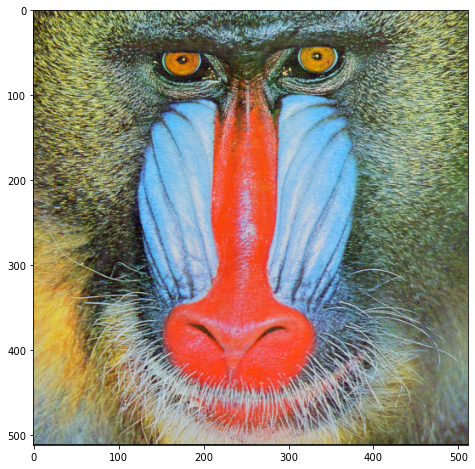

In [5]:
A = imread('mandrill-large (1).tiff')
plt.figure(figsize=(8,8))
plt.imshow(A)

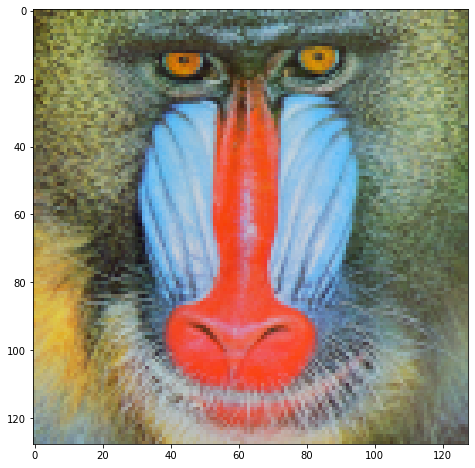

In [7]:
B = imread('mandrill-small.tiff')
plt.figure(figsize=(8,8))
plt.imshow(B)

We will now run K-means clustering on the pixels of this image. We run the loop for a minimum of 30 iterations, and use 16 clusters. The algorithm runs as follows:

1. Randomly pick 16 pixels from the image to initialize the centroids

2. Repeat until convergence:

a. Assign each pixel from the image to the neareast centroid

b. For each centroid, calculate the mean of all the pixels assigned to it

c. Update the centroids to the mean calculated in step 2.

In [8]:
def k_means(X, n_centroids=16, min_iter=30):
    C = X.reshape(-1,3)
    # Randomly initialize the centroids
    centroids = C[np.random.randint(0, C.shape[0], n_centroids)]
    error_history = []
    error = 1
    n_iter = 0
    
    # Loop until for at least min_iter and while the centroids are not stable
    while (error > 0 or n_iter < min_iter):
        # For each pixel, calculate the distance to all current centroids:
        norms = np.array([np.linalg.norm(C-centroids[k,:],2,1) for k in range(n_centroids)]).T
        # Assign each pixel to the closest centroid:
        assign = np.argmin(norms,1)
        # For a given centroid, calculate the mean of the pixels assigned to it:
        means = np.array([np.mean(C[np.where(assign == k)],0) for k in range(n_centroids)])
        # Check for stability of the centroids and keep track of the error history
        error = np.linalg.norm(centroids-means,1,1).sum()
        error_history.append(error)
        # Assign the new centroids as the means calculated previously:
        centroids = means
        n_iter += 1
        
    return centroids, error_history

In [9]:
centroids, error_history = k_means(B)

Text(0, 0.5, 'Norm 1 Error')

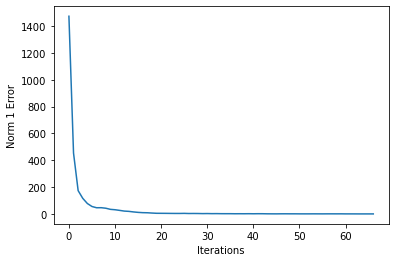

In [10]:
plt.plot(error_history)
plt.xlabel('Iterations')
plt.ylabel('Norm 1 Error')

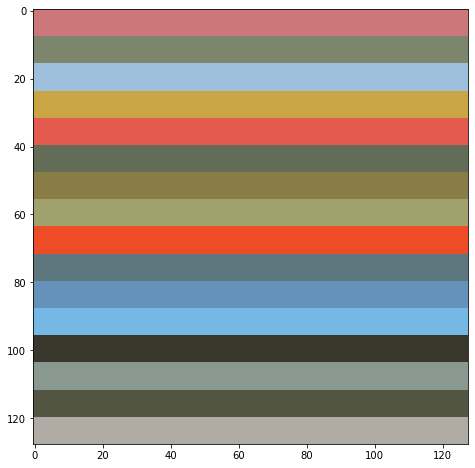

In [11]:
centroids = centroids.astype(int)
colormap = np.repeat(centroids,1024,0).reshape(128,128,3)
plt.figure(figsize=(8,8))
plt.imshow(colormap)

In [12]:
C = A.reshape(-1,3)
# For each pixel, calculate the distance to all current centroids:
norms = np.array([np.linalg.norm(C-centroids[k,:],2,1) for k in range(centroids.shape[0])]).T
# Assign each pixel to the closest centroid:
assign = np.argmin(norms,1)

# Create a new image where each pixel is the the centroid closest to the pixel in the original image
compressed_image = np.array([centroids[assign[k]] for k in range(assign.shape[0])])
compressed_image = compressed_image.reshape(512,512,3)

Text(0.5, 1.0, 'Compressed Image')

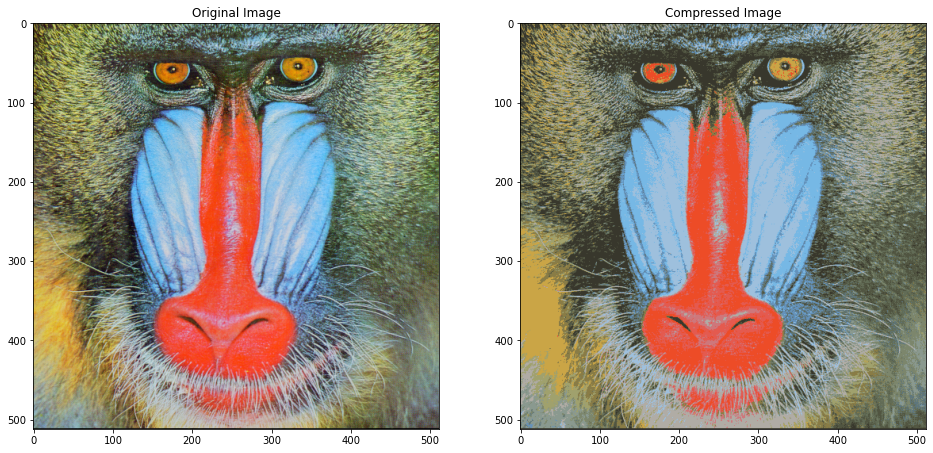

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax0, ax1 = axes.ravel()

ax0.imshow(A)
ax0.set_title('Original Image')
ax1.imshow(compressed_image)
ax1.set_title('Compressed Image')